# 3. Machine Learning for Classification

We'll use logistic regression to predict churn


## 3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
import urllib.request

url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"  # replace with your actual $data link
urllib.request.urlretrieve(url, "data/data-week-3.csv")

('data/data-week-3.csv', <http.client.HTTPMessage at 0x2642f905640>)

In [4]:
df = pd.read_csv('data/data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

For some reason `totalcharges` is an object but should be a number. Let's check it:

In [9]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

Yes, it looks like a number, but for some reason it is an object. Maybe some of the values are not numbers.

In [10]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

`Unable to parse string "_" at position 488` this means that observation 488 has totalcharges = _ which is not numeric. So, we can use `errors='coerce'` this will tell pandas to replace `weird`(non-numeric) things with `NaN`.

In [11]:
df.totalcharges.iloc[488]

'_'

In [12]:
df['totalcharges'].iloc[488]

'_'

In [13]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [14]:
tc.iloc[488]

nan

In [15]:
tc.isnull().sum()

11

Let's replace total charges with the new value 

In [16]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

Let's fill missing values with zeros

In [17]:
df.totalcharges = df.totalcharges.fillna(0)

In [18]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

For our model we need the `churn` equal to 1 or 0

In [19]:
# df.churn == 'yes' this type crease True or False. True when 'yes'. .astype(int) converts each Boolean value into an integer: True - 1, False - 0
df.churn = (df.churn == 'yes').astype(int)
df.churn.head(5)

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

## 3.3 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Check documentation
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [22]:
df_full_train, df_test = train_test_split(df, 
                 test_size=0.2,
                 random_state=1)
df_train, df_val = train_test_split(df_full_train,
                                    test_size=0.25,
                                    random_state=1)

In [23]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [24]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


We see here that indexes are shuffled. Let's reset them from 0 to max len(df)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [27]:
# .values ensures that we take the values of the churn variable. Otherwise, we will take an index and the values.
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

# # Delete the outcome variable so that we don't use it as a control variable
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [28]:
# For EDA we are going to use our full dataset
df_full_train = df_full_train.reset_index(drop=True)

In [29]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [29]:
df_full_train.churn.value_counts(normalize=True).round(2)

churn
0    0.73
1    0.27
Name: proportion, dtype: float64

In [30]:
df_full_train.churn.mean().round(2)

0.27

In [31]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [32]:
numerical = list(
    df_full_train.columns[
    (df_full_train.dtypes == 'float64') | (df_full_train.dtypes == 'int64')
]
)
numerical

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']

We should delete `seniorcitizen` since it is categorial 1 = senior citizen, 0 - not

In [33]:
numerical.remove('seniorcitizen')
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [34]:
categorical = list(
    df_full_train.columns[df_full_train.dtypes == 'object']
)
categorical

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

Delete `customerid` as this is not a categorical variable, but rather an identifier

In [35]:
categorical.remove('customerid')
categorical.append('seniorcitizen')

categorical

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'seniorcitizen']

Number of unique values of each categorical variable

In [36]:
df_full_train[categorical].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
seniorcitizen       2
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

#### Churn rate

In [37]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [38]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean().round(3)
churn_female

0.277

In [39]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean().round(3)
churn_male

0.263

In [40]:
global_churn = df_full_train.churn.mean().round(3)
global_churn

0.27

In [41]:
global_churn - churn_female

-0.007000000000000006

In [42]:
global_churn - churn_male

0.007000000000000006

In [43]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [44]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [45]:
global_churn - churn_partner

0.06496669133974836

In [46]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [47]:
global_churn - churn_no_partner

-0.0598090040927694

#### Risk ratio

In [48]:
churn_no_partner / global_churn

1.22151482997322

In [49]:
churn_partner / global_churn

0.7593826246675986

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [50]:
from IPython.display import display

In [51]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count']).round(3)
    df_group['diff'] = (df_group['mean'] - global_churn).round(3)
    df_group['risk'] = (df_group['mean'] / global_churn).round(3)
    display(df_group)
    print('\n')

gender


,mean,count,diff,risk
gender,,,,
female,0.277,2796,0.007,1.026
male,0.263,2838,-0.007,0.974




partner


,mean,count,diff,risk
partner,,,,
no,0.330,2932,0.060,1.222
yes,0.205,2702,-0.065,0.759




dependents


,mean,count,diff,risk
dependents,,,,
no,0.314,3968,0.044,1.163
yes,0.166,1666,-0.104,0.615




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241,547,-0.029,0.893
yes,0.273,5087,0.003,1.011




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257,2700,-0.013,0.952
no_phone_service,0.241,547,-0.029,0.893
yes,0.291,2387,0.021,1.078




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192,1934,-0.078,0.711
fiber_optic,0.425,2479,0.155,1.574
no,0.078,1221,-0.192,0.289




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.421,2801,0.151,1.559
no_internet_service,0.078,1221,-0.192,0.289
yes,0.153,1612,-0.117,0.567




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404,2498,0.134,1.496
no_internet_service,0.078,1221,-0.192,0.289
yes,0.217,1915,-0.053,0.804




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.396,2473,0.126,1.467
no_internet_service,0.078,1221,-0.192,0.289
yes,0.230,1940,-0.040,0.852




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.419,2781,0.149,1.552
no_internet_service,0.078,1221,-0.192,0.289
yes,0.160,1632,-0.110,0.593




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.343,2246,0.073,1.270
no_internet_service,0.078,1221,-0.192,0.289
yes,0.303,2167,0.033,1.122




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.339,2213,0.069,1.256
no_internet_service,0.078,1221,-0.192,0.289
yes,0.307,2200,0.037,1.137




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.432,3104,0.162,1.600
one_year,0.121,1186,-0.149,0.448
two_year,0.028,1344,-0.242,0.104




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172,2313,-0.098,0.637
yes,0.338,3321,0.068,1.252




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168,1219,-0.102,0.622
credit_card_(automatic),0.164,1217,-0.106,0.607
electronic_check,0.456,1893,0.186,1.689
mailed_check,0.194,1305,-0.076,0.719




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242,4722,-0.028,0.896
1,0.413,912,0.143,1.530


## 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much 
we can learn about one variable if we know the value of another

* https://en.wikipedia.org/wiki/Mutual_information

In [52]:
from sklearn.metrics import mutual_info_score

In [53]:
mutual_info_score?

Signature: mutual_info_score(labels_true, labels_pred, *, contingency=None)
Docstring:
Mutual Information between two clusterings.

The Mutual Information is a measure of the similarity between two labels
of the same data. Where :math:`|U_i|` is the number of the samples
in cluster :math:`U_i` and :math:`|V_j|` is the number of the
samples in cluster :math:`V_j`, the Mutual Information
between clusterings :math:`U` and :math:`V` is given as:

.. math::

    MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
    \log\frac{N|U_i \cap V_j|}{|U_i||V_j|}

This metric is independent of the absolute values of the labels:
a permutation of the class or cluster label values won't change the
score value in any way.

This metric is furthermore symmetric: switching :math:`U` (i.e
``label_true``) with :math:`V` (i.e. ``label_pred``) will return the
same score value. This can be useful to measure the agreement of two
independent label assignments strategies on the same dataset when the

The order in which we pass features does not matter

In [54]:
mutual_info_score(df_full_train.churn, df_full_train.contract).round(3)

0.098

In [55]:
mutual_info_score(df_full_train.gender, df_full_train.churn).round(4)

0.0001

In [56]:
mutual_info_score(df_full_train.contract, df_full_train.churn).round(3)

0.098

In [57]:
mutual_info_score(df_full_train.partner, df_full_train.churn).round(4)

0.01

In [58]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn).round(4)

In [59]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.0983
onlinesecurity      0.0631
techsupport         0.0610
internetservice     0.0559
onlinebackup        0.0469
deviceprotection    0.0435
paymentmethod       0.0432
streamingtv         0.0319
streamingmovies     0.0316
paperlessbilling    0.0176
dependents          0.0123
partner             0.0100
seniorcitizen       0.0094
multiplelines       0.0009
phoneservice        0.0002
gender              0.0001
dtype: float64

## 3.7 Feature importance: Correlation

How about numerical columns?

* Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [60]:
# Number of months a customer spent with us
df_full_train.tenure.max()

72

In [61]:
df_full_train[numerical + ['churn']].corr().round(3)

,tenure,monthlycharges,totalcharges,churn
tenure,1.000,0.251,0.828,-0.352
monthlycharges,0.251,1.000,0.651,0.197
totalcharges,0.828,0.651,1.000,-0.196
churn,-0.352,0.197,-0.196,1.000


In [62]:
df_full_train[numerical].corrwith(df_full_train.churn).abs().round(3)

tenure            0.352
monthlycharges    0.197
totalcharges      0.196
dtype: float64

In [63]:
df_full_train[df_full_train.tenure <= 2].churn.mean().round(3)

0.595

In [64]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean().round(3)

0.399

In [65]:
df_full_train[df_full_train.tenure > 12].churn.mean().round(3)

0.176

In [66]:
display(df_full_train.monthlycharges.min(), df_full_train.monthlycharges.max())

18.25

118.65

In [67]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean().round(3)

0.088

In [68]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean().round(3)

0.183

In [69]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean().round(3)

0.325

## 3.8 One-hot encoding

* Use Scikit-Learn to encode categorical features

In [70]:
from sklearn.feature_extraction import DictVectorizer

In [71]:
# Let's create an instance of DictVectorizer. sparse=False) - return a usual numpy array, if you don't do it like this u will get 
dv = DictVectorizer(sparse=False)

# Try this - df_full_train[['gender', 'contract']].iloc[:10].to_dict(orient='records')
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [72]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

## 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

In [73]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [74]:
z = np.linspace(-7, 7, 51)

In [75]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

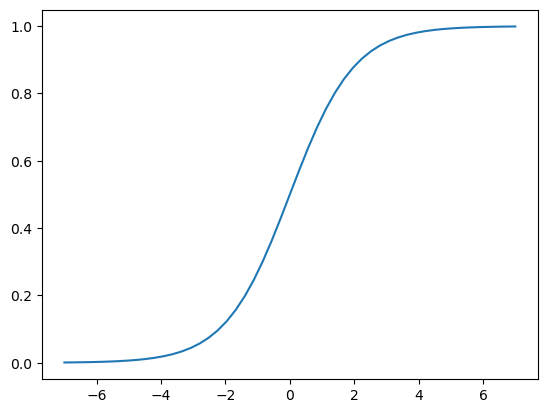

In [77]:
plt.plot(z, sigmoid(z))
plt.show();

No matter what kind of number you put into sigmoid, the output will be always in range between -1 and 1. 

In [82]:
display(sigmoid(0))
display(sigmoid(-1000000))
display(sigmoid(1000000))

0.5

C:\Users\A2010015\AppData\Local\Temp\ipykernel_22408\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


0.0

1.0

In [83]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [84]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices co

In [87]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

c:\Users\A2010015\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
model.intercept_[0].round(3)

-0.109

In [90]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [93]:
# The output will be a matrix with two columns, where the 1st is the probability of being in the negative class (i.e., 0), while the second one is the probability of being in the positive class (i.e., 1)
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00899994, 0.2045765 , 0.21225399, ..., 0.13642888, 0.79979376,
       0.83742684])

In [96]:
model.predict_proba(X_val)

array([[0.99100006, 0.00899994],
       [0.7954235 , 0.2045765 ],
       [0.78774601, 0.21225399],
       ...,
       [0.86357112, 0.13642888],
       [0.20020624, 0.79979376],
       [0.16257316, 0.83742684]])

In [98]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [100]:
(y_val == churn_decision).mean().round(3)

0.803

In [103]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred.round(4)
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.0090,0,0
1,0.2046,0,0
2,0.2123,0,0
3,0.5430,1,1
4,0.2138,0,0
...,...,...,...
1404,0.3139,0,0
1405,0.0394,0,1
1406,0.1364,0,0
1407,0.7998,1,1


In [108]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred['correct'] 

0        True
1        True
2        True
3        True
4        True
        ...  
1404     True
1405    False
1406     True
1407     True
1408     True
Name: correct, Length: 1409, dtype: bool

In [107]:
df_pred.correct.mean().round(3)

0.803

In [72]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [124]:
a = [1, 2, 3, 4]
b = 'abcd'

In [125]:
# joins each element with each other
display(list(zip(a, b)))
display(dict(zip(a, b)))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [126]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.142,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.123,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

This is a long list, let's take a subset of it.

In [140]:
small = ['contract', 'tenure', 'monthlycharges']

In [142]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [143]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [144]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [145]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [146]:
X_train_small = dv_small.transform(dicts_train_small)

In [147]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [153]:
# Bias term (or intercept) -  what we assume about a customer without knowing nothing about him
w0 = model_small.intercept_[0].round(3)
w0

-2.478

In [151]:
w = model_small.coef_[0].round(3)
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [152]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [155]:
sigmoid(-2.47)

0.07798823512936635

In [161]:
sigmoid(-2.47 + 0.971)

0.18257471762614302

In [162]:
sigmoid(-2.47 + 0.971 + 50 * 0.027)

0.4628187629475805

In [164]:
sigmoid(-2.47 + 0.971 + 50 * 0.027 + 5 * (-0.036))

0.41848395843712505

## 3.12 Using the model

In [165]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train

[{'gender': 'male',
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'seniorcitizen': 0,
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'seniorcitizen': 0,
  'tenur

In [167]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
X_full_train.shape

(5634, 45)

In [168]:
y_full_train = df_full_train.churn.values

In [169]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

c:\Users\A2010015\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [171]:
X_test = dv.transform(dicts_test)

In [172]:
y_pred = model.predict_proba(X_test)[:, 1]

In [175]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False, False,  True])

In [174]:
(churn_decision == y_test).mean().round(3)

0.815

Let's check the info of the last customer

In [177]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'seniorcitizen': 0,
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

She is female with a partner, that was 17 months with the company and is paying 104.2 monthly fee

In [178]:
X_small = dv.transform([customer])
X_small

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [180]:
model.predict_proba(X_small)[0, 1].round(3)

0.655

The actual decision of [-1] customer was that she did not churn. Which is close to our prediction if we use a treshold of 0.5

In [181]:
y_test[-1]

1

## 3.13 Summary

* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with `DictVectorizer`
* Logistic regression - linear model like linear regression
* Output of log reg - probability
* Interpretation of weights is similar to linear regression

## 3.14 Explore more

More things

* Try to exclude least useful features


Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

